İstanbul Topkapı Üniversitesi             
Mühendislik Fakültesi               
Bilgisayar Mühendisliği Bölümü          
(FET340) Makine Öğrenmesi                     
Öğretim Elemanı: Dr. Öğr. Üyesi Gökalp TULUM          
Öğrenci İsmi: Berkay KÖSE                   
Öğrenci Numarası: 21040101012

Kullandığım Veri Setinin Uzantısı:        
https://github.com/ashishpatel26/Pima-Indians-Diabetes-Dataset-Missing-Value-Imputation

Kullandığım Veri Setinin Açıklaması:              
Pima Kızılderilileri Diyabet Veri Seti, Pima Kızılderililerinin tıbbi detaylarını verilerek 5 yıl içinde diyabet başlangıcını tahmin etmeyi içerir. Bu, ikili (2-sınıflı) bir sınıflandırma problemidir. Her sınıf için gözlem sayısı dengeli değildir. 8 giriş değişkeni ve 1 çıktı değişkeni bulunan 768 gözlem bulunmaktadır. Değişken isimleri aşağıdaki gibidir:

0.   Hamile kalma sayısı.
1.   Oral glukoz tolerans testinde 2 saatte plazma glukoz konsantrasyonu.
2.   Diyastolik kan basıncı (mm Hg).
3.   Triseps deri kıvrım kalınlığı (mm).
4.   2 Saatlik serum insülini (mu U/ml).
5.   Vücut kitle indeksi (kg cinsinden ağırlık/(m cinsinden boy)^2).
6.   Diyabet soyağacı fonksiyonu.
7.   Yaş (yıl).
8.   Sınıf değişkeni (0 veya 1).

1. Ortam Kurulumu ve Veri Setinin Hazırlanması

In [2]:
# Gerekli Kütüphanelerin Kurulması

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk;

In [3]:
# Veri Setinin Hazırlanması

# Veri setinin URL'si
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

# Veri setindeki sütun isimlerini belirler.
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

# Veri setini URL'den okur ve pandas DataFrame olarak yükler.
data = pd.read_csv(url, header=None, names=column_names)

# İlk birkaç satırı görüntüler.
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


2. Veri Ön İşleme

In [4]:
# Eksik Değerlerin İşlenmesi

# Mantıksal olarak eksik değerlerin sıfır olduğu sütunlar
cols_with_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Bu sütunlardaki sıfırları NA ile değiştirilir.
data[cols_with_missing] = data[cols_with_missing].replace(0, pd.NA)

# Eksik değerleri sütunların medyan değerleri ile doldurulur.
data.fillna(data.median(), inplace=True)

# Eksik değerlerin başarılı bir şekilde doldurulduğunu kontrol edilir.
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [5]:
# Veri setinin %70 eğitim ve %30 test olarak ayrılması

# Veri setini eğitim ve test olarak ayırmak için gerekli kütüphane
from sklearn.model_selection import train_test_split

# Bağımsız ve bağımlı değişkenleri ayırır.
X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Veri setini %70 eğitim ve %30 test olarak ayırır.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Eğitim ve test setlerinin boyutlarını kontrol eder.
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(537, 8) (231, 8)
(537,) (231,)


3. Naive Bayes Sınıflandırıcısının Uygulanması

In [6]:
# Modelin Eğitilmesi

# Gaussian Naive Bayes sınıflandırıcısını kullanmak için gerekli kütüphane
from sklearn.naive_bayes import GaussianNB

# Modelin performansını değerlendirmek için gerekli metrikleri içeren kütüphane
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# Naive Bayes sınıflandırıcısını oluşturur.
nb_model = GaussianNB()

# Modeli eğitim verisi ile eğitir.
nb_model.fit(X_train, y_train)

GaussianNB()

Confusion Matrix:
[[119  32]
 [ 28  52]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       151
           1       0.62      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



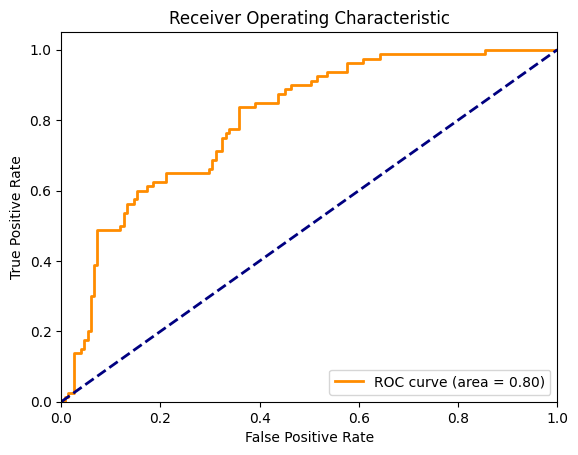

In [7]:
# Modelin Test Edilmesi ve Sonuçların Raporlanması

# Test verisi ile tahmin yapar.
y_pred = nb_model.predict(X_test)

# Konfüzyon matrisini yazdırır.
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Sınıflandırma raporunu yazdırır. (accuracy, precision, recall, f1-score)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# ROC eğrisini hesaplar.
fpr, tpr, _ = roc_curve(y_test, nb_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# ROC eğrisini görselleştirmek için matplotlib kütüphanesi import edilir.
import matplotlib.pyplot as plt

# ROC eğrisini görselleştiren kod parçası
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

4. K-En Yakın Komşuluk (KNN) Sınıflandırıcısının Uygulanması

In [8]:
# Modelin Eğitilmesi ve En İyi K Değerinin Belirlenmesi

# KNN sınıflandırıcısını kullanmak ve model seçiminde grid search yapmak için gerekli kütüphaneler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Parametre aralığını belirler.
param_grid = {'n_neighbors': range(1, 31)}

# KNN sınıflandırıcısını oluşturur.
knn = KNeighborsClassifier()

# GridSearchCV kullanarak en iyi k değerini bulur.
grid_search = GridSearchCV(knn, param_grid, cv=10)
grid_search.fit(X_train, y_train)

# En iyi k değerini yazdırır.
print(f"En iyi k değeri: {grid_search.best_params_['n_neighbors']}")

En iyi k değeri: 19


In [9]:
# En İyi K Değeri ile Modelin Test Edilmesi ve Sonuçların Raporlanması

# En iyi k değeri ile KNN modelini oluşturur.
best_k = grid_search.best_params_['n_neighbors']
knn_model = KNeighborsClassifier(n_neighbors=best_k)

# Modeli eğitim verisi ile eğitir.
knn_model.fit(X_train, y_train)

# Test verisi ile tahmin yapar.
y_pred = knn_model.predict(X_test)

# Konfüzyon matrisini yazdırır.
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Sınıflandırma raporunu yazdırır. (accuracy, precision, recall, f1-score)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[122  29]
 [ 39  41]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.81      0.78       151
           1       0.59      0.51      0.55        80

    accuracy                           0.71       231
   macro avg       0.67      0.66      0.66       231
weighted avg       0.70      0.71      0.70       231



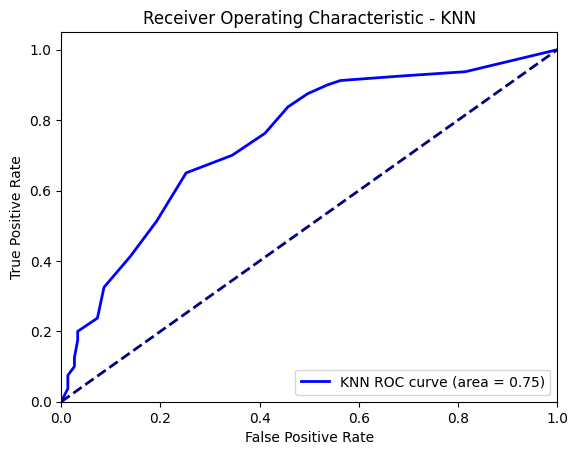

In [10]:
# KNN için ROC eğrisini hesaplar.
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_model.predict_proba(X_test)[:, 1])
knn_roc_auc = auc(knn_fpr, knn_tpr)

# ROC eğrisini görselleştirir.
plt.figure()
plt.plot(knn_fpr, knn_tpr, color='blue', lw=2, label='KNN ROC curve (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - KNN')
plt.legend(loc="lower right")
plt.show()

5. MLP ve SVM Sınıflandırıcılarının Uygulanması

In [11]:
# Multi-Layer Perceptron (MLP) Modelinin Eğitilmesi ve Test Edilmesi

# Multi-Layer Perceptron modelini kullanmak için gerekli kütüphane
from sklearn.neural_network import MLPClassifier

# MLP modelini oluşturun ve parametreleri belirler.
mlp_model = MLPClassifier(max_iter=1000, random_state=42)

# Modeli eğitim verisi ile eğitir.
mlp_model.fit(X_train, y_train)

# Test verisi ile tahmin yapar.
y_pred = mlp_model.predict(X_test)

# Konfüzyon matrisini yazdırır.
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Sınıflandırma raporunu yazdırır. (accuracy, precision, recall, f1-score)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[119  32]
 [ 46  34]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.79      0.75       151
           1       0.52      0.42      0.47        80

    accuracy                           0.66       231
   macro avg       0.62      0.61      0.61       231
weighted avg       0.65      0.66      0.65       231



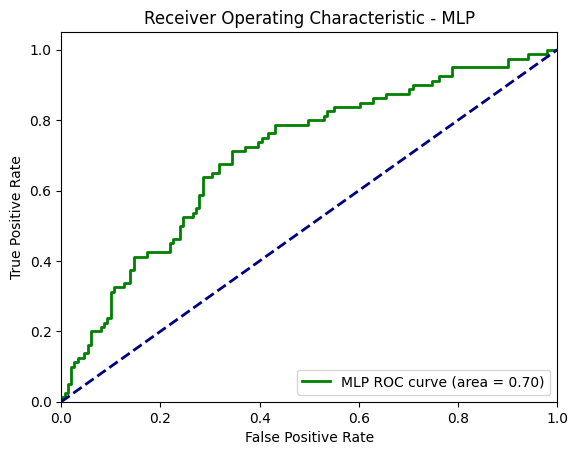

In [13]:
# MLP için ROC eğrisini hesaplar.
mlp_fpr, mlp_tpr, _ = roc_curve(y_test, mlp_model.predict_proba(X_test)[:, 1])
mlp_roc_auc = auc(mlp_fpr, mlp_tpr)

# ROC eğrisini görselleştirir.
plt.figure()
plt.plot(mlp_fpr, mlp_tpr, color='green', lw=2, label='MLP ROC curve (area = %0.2f)' % mlp_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - MLP')
plt.legend(loc="lower right")
plt.show()

In [14]:
# Support Vector Machines (SVM) Modelinin Eğitilmesi ve Test Edilmesi

# Support Vector Machines modelini kullanmak için gerekli kütüphane
from sklearn.svm import SVC

# SVM modelini oluşturun ve parametreleri belirler.
svm_model = SVC(probability=True, random_state=42)

# Modeli eğitim verisi ile eğitir.
svm_model.fit(X_train, y_train)

# Test verisi ile tahmin yapar.
y_pred = svm_model.predict(X_test)

# Konfüzyon matrisini yazdırır.
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Sınıflandırma raporunu yazdırır. (accuracy, precision, recall, f1-score)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[131  20]
 [ 40  40]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.87      0.81       151
           1       0.67      0.50      0.57        80

    accuracy                           0.74       231
   macro avg       0.72      0.68      0.69       231
weighted avg       0.73      0.74      0.73       231



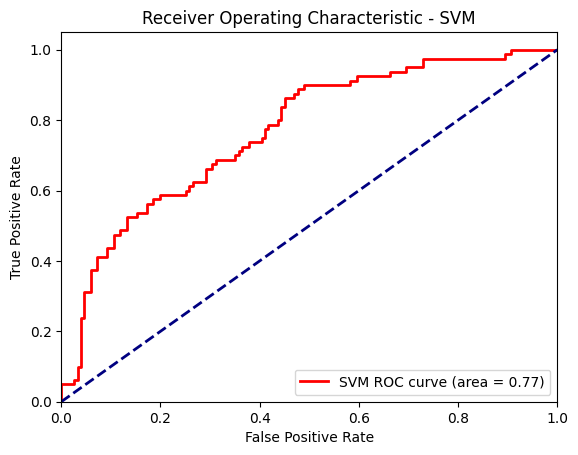

In [15]:
# SVM için ROC eğrisini hesaplar.
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_model.predict_proba(X_test)[:, 1])
svm_roc_auc = auc(svm_fpr, svm_tpr)

# ROC eğrisini görselleştirir.
plt.figure()
plt.plot(svm_fpr, svm_tpr, color='red', lw=2, label='SVM ROC curve (area = %0.2f)' % svm_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - SVM')
plt.legend(loc="lower right")
plt.show()

In [16]:
from sklearn.metrics import classification_report

# Naive Bayes
nb_report = classification_report(y_test, nb_model.predict(X_test), output_dict=True)

# KNN
knn_report = classification_report(y_test, knn_model.predict(X_test), output_dict=True)

# MLP
mlp_report = classification_report(y_test, mlp_model.predict(X_test), output_dict=True)

# SVM
svm_report = classification_report(y_test, svm_model.predict(X_test), output_dict=True)

# Kullanılmış olan tüm modellerin performans metriklerini tablo olarak özetler.
reports = {
    "Naive Bayes": nb_report,
    "KNN": knn_report,
    "MLP": mlp_report,
    "SVM": svm_report
}

df_reports = pd.DataFrame(reports).transpose()
print(df_reports[['accuracy', 'macro avg', 'weighted avg']])

             accuracy                                          macro avg  \
Naive Bayes   0.74026  {'precision': 0.7142857142857143, 'recall': 0....   
KNN          0.705628  {'precision': 0.6717391304347826, 'recall': 0....   
MLP          0.662338  {'precision': 0.6181818181818182, 'recall': 0....   
SVM           0.74026  {'precision': 0.7163742690058479, 'recall': 0....   

                                                  weighted avg  
Naive Bayes  {'precision': 0.743558029272315, 'recall': 0.7...  
KNN          {'precision': 0.6981796671237666, 'recall': 0....  
MLP          {'precision': 0.6498491407582317, 'recall': 0....  
SVM          {'precision': 0.7316523632313106, 'recall': 0....  


In [19]:
# Performans metriklerini hesaplayan ve tablo oluşturan fonksiyon
def model_performance_report(y_test, y_pred, model_name):
    report = classification_report(y_test, y_pred, output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    report_df['model'] = model_name
    return report_df

# Naive Bayes
nb_report = model_performance_report(y_test, nb_model.predict(X_test), "Naive Bayes")

# KNN
knn_report = model_performance_report(y_test, knn_model.predict(X_test), "KNN")

# MLP
mlp_report = model_performance_report(y_test, mlp_model.predict(X_test), "MLP")

# SVM
svm_report = model_performance_report(y_test, svm_model.predict(X_test), "SVM")

# Tüm raporları birleştirir.
performance_report = pd.concat([nb_report, knn_report, mlp_report, svm_report])

# Görüntüleme
performance_report.reset_index(inplace=True)
performance_report

,index,precision,recall,f1-score,support,model
0,0,0.809524,0.788079,0.798658,151.000000,Naive Bayes
1,1,0.619048,0.650000,0.634146,80.000000,Naive Bayes
2,accuracy,0.740260,0.740260,0.740260,0.740260,Naive Bayes
3,macro avg,0.714286,0.719040,0.716402,231.000000,Naive Bayes
4,weighted avg,0.743558,0.740260,0.741684,231.000000,Naive Bayes
5,0,0.757764,0.807947,0.782051,151.000000,KNN
6,1,0.585714,0.512500,0.546667,80.000000,KNN
7,accuracy,0.705628,0.705628,0.705628,0.705628,KNN
8,macro avg,0.671739,0.660224,0.664359,231.000000,KNN
9,weighted avg,0.698180,0.705628,0.700533,231.000000,KNN


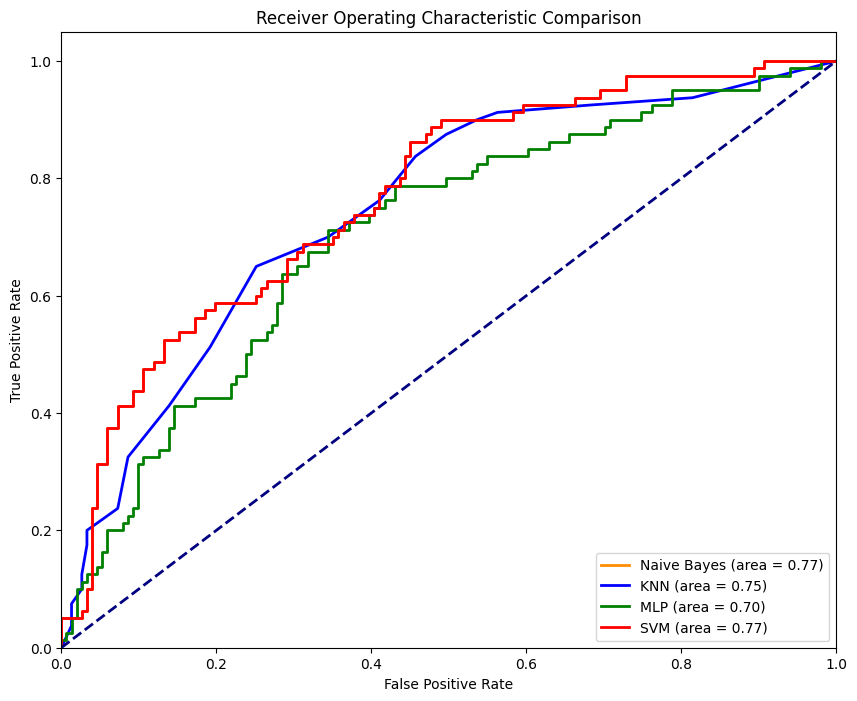

In [20]:
# Tüm modeller için ROC eğrilerini aynı grafikte gösterir.
plt.figure(figsize=(10, 8))

# Naive Bayes
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Naive Bayes (area = %0.2f)' % roc_auc)

# KNN
plt.plot(knn_fpr, knn_tpr, color='blue', lw=2, label='KNN (area = %0.2f)' % knn_roc_auc)

# MLP
plt.plot(mlp_fpr, mlp_tpr, color='green', lw=2, label='MLP (area = %0.2f)' % mlp_roc_auc)

# SVM
plt.plot(svm_fpr, svm_tpr, color='red', lw=2, label='SVM (area = %0.2f)' % svm_roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Comparison')
plt.legend(loc="lower right")
plt.show()

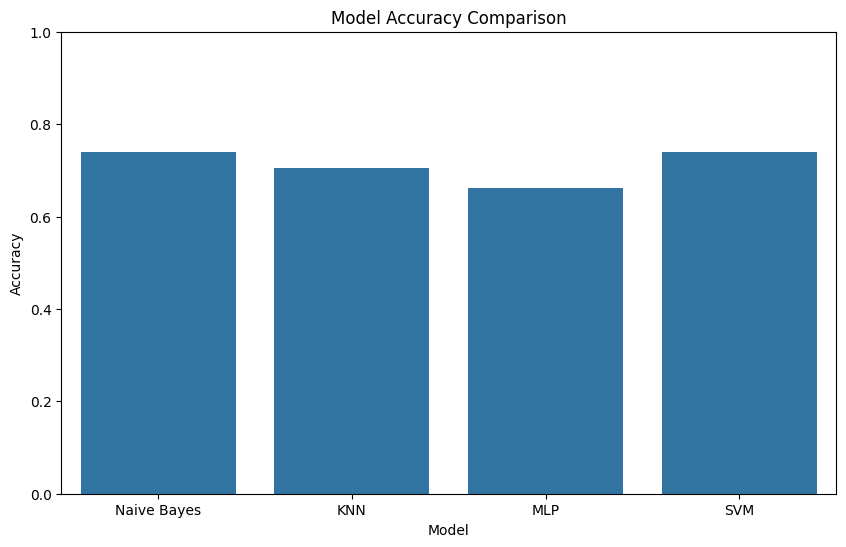

In [21]:
# Genel doğruluk oranları
accuracy_scores = {
    "Model": ["Naive Bayes", "KNN", "MLP", "SVM"],
    "Accuracy": [
        nb_model.score(X_test, y_test),
        knn_model.score(X_test, y_test),
        mlp_model.score(X_test, y_test),
        svm_model.score(X_test, y_test)
    ]
}

accuracy_df = pd.DataFrame(accuracy_scores)

# Bar grafiği oluşturur.
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Accuracy", data=accuracy_df)
plt.title("Model Accuracy Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()
